# CODE EXAMPLE OF KNN ALGORITHM

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, datasets

Load data

In [2]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

Splitting data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

Standardize/Normalization

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train the model: setting the K hyperparameter and "fit" it to the training data - in quotes as KNN does not train instead does instance based learning.

In [5]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Testing - Make predictions

In [6]:
y_pred = knn.predict(X_test)

Evaluating the model

     Actual  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
109       1          1
110       0          0
111       1          1
112       0          0
113       0          0

[114 rows x 2 columns]


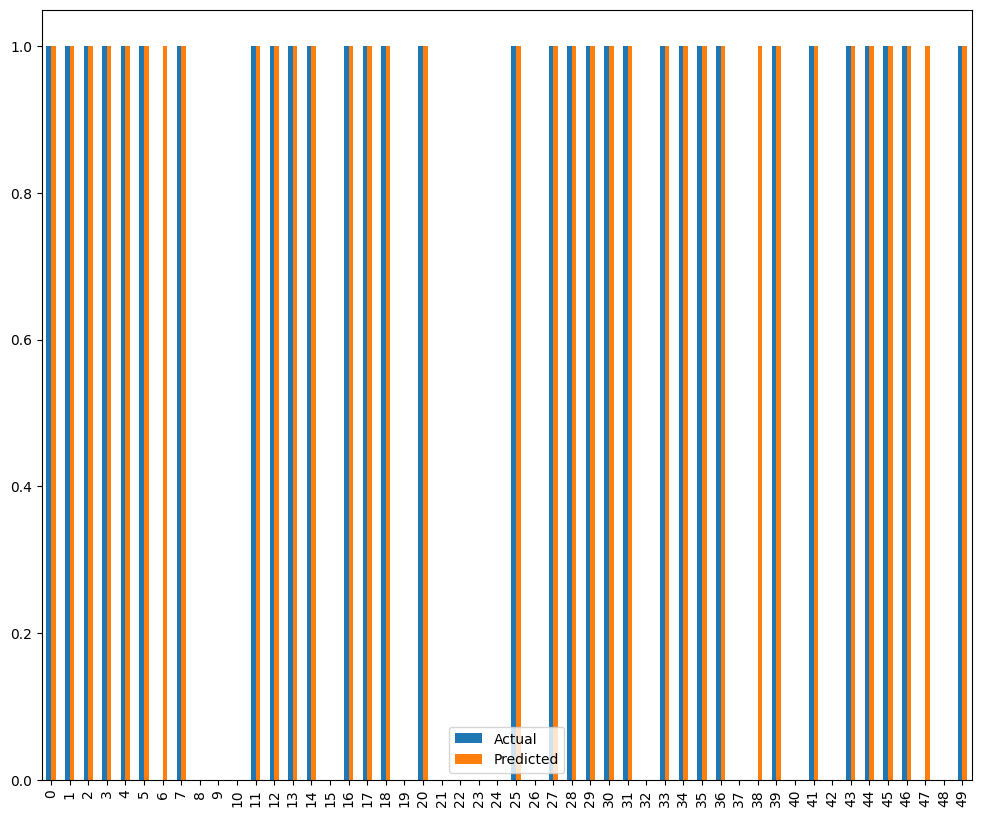

Accuracy: 0.9473684210526315


In [8]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

df1 = df.head(50)
df1.plot(kind='bar', figsize=(12,10))
plt.show()

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Play around with the K values to find the best K that maximizes the accuracy